In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings('ignore')

# For better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [17]:
#Step1:Load the Dataset
file_path='/kaggle/input/glassdoor-data-science-jobs/Glassdoor_Job_Postings.csv'
df=pd.read_csv(file_path)

### Data Cleaning

In [4]:
# Strip text fields
df['location'] = df['location'].str.strip().replace({'Hyderābād': 'Hyderabad'})
df['job_title'] = df['job_title'].str.strip().str.lower().str.title()

# Clean salary: ₹ -> '' and remove commas
df['salary_avg_estimate'] = (
    df['salary_avg_estimate']
    .replace('[₹,]', '', regex=True)
    .replace('null', np.nan)
)
df['salary_avg_estimate'] = pd.to_numeric(df['salary_avg_estimate'], errors='coerce')

# Handle missing values (optional drop)
df = df.dropna(subset=['salary_avg_estimate', 'job_title', 'location'])


### Job Market Analysis: Titles, Locations, Companies


### Top Job Titles

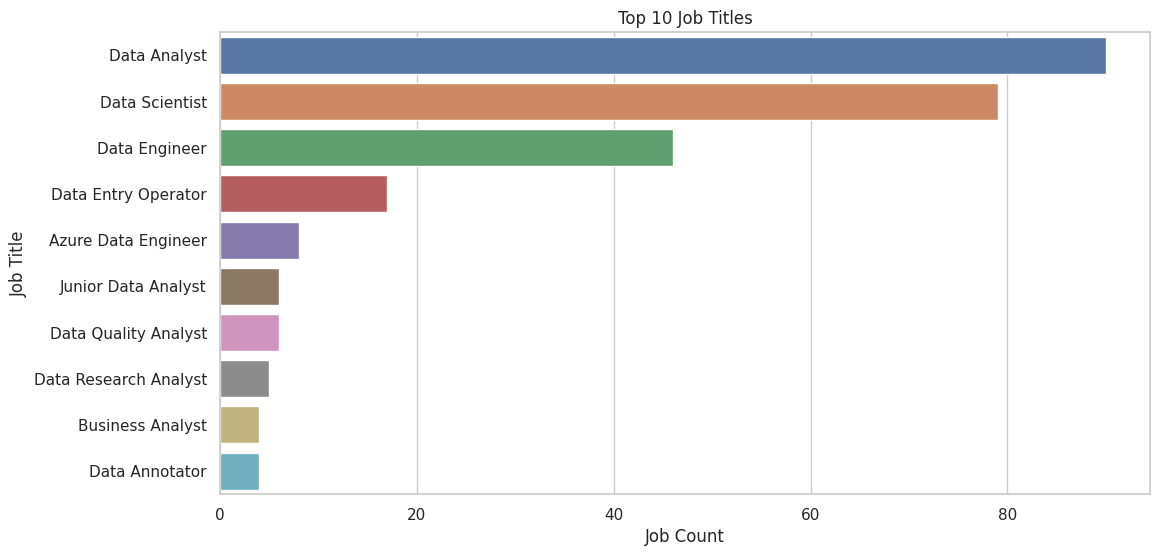

In [5]:
top_titles = df['job_title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.title('Top 10 Job Titles')
plt.xlabel('Job Count')
plt.ylabel('Job Title')
plt.show()

### Top Locations

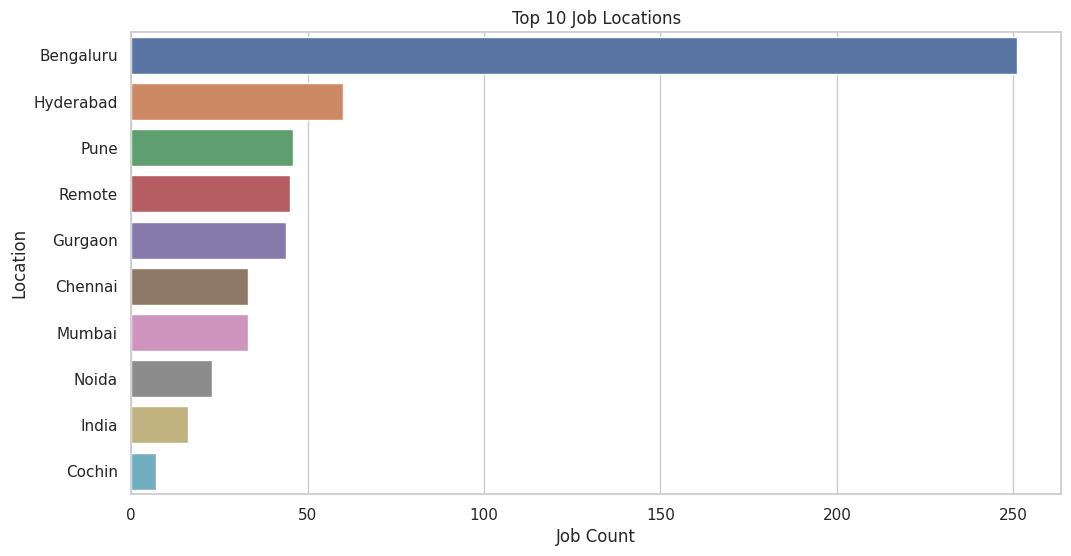

In [6]:
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Job Locations')
plt.xlabel('Job Count')
plt.ylabel('Location')
plt.show()

### Top Companies

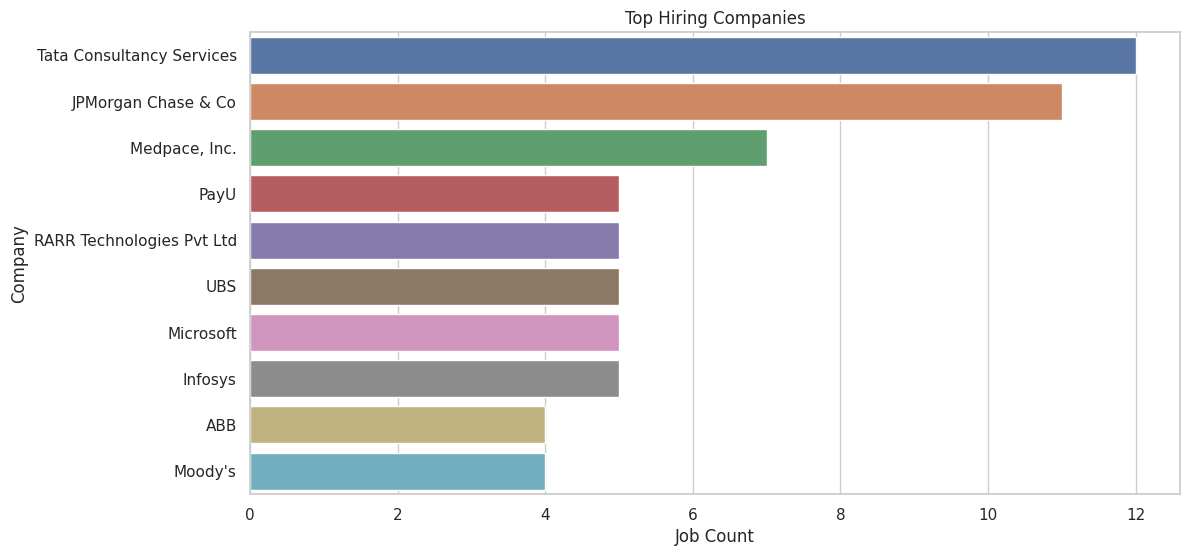

In [7]:
top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top Hiring Companies')
plt.xlabel('Job Count')
plt.ylabel('Company')
plt.show()

### Salary Trends

#### Salary Distribution

#### Salary by Job Title

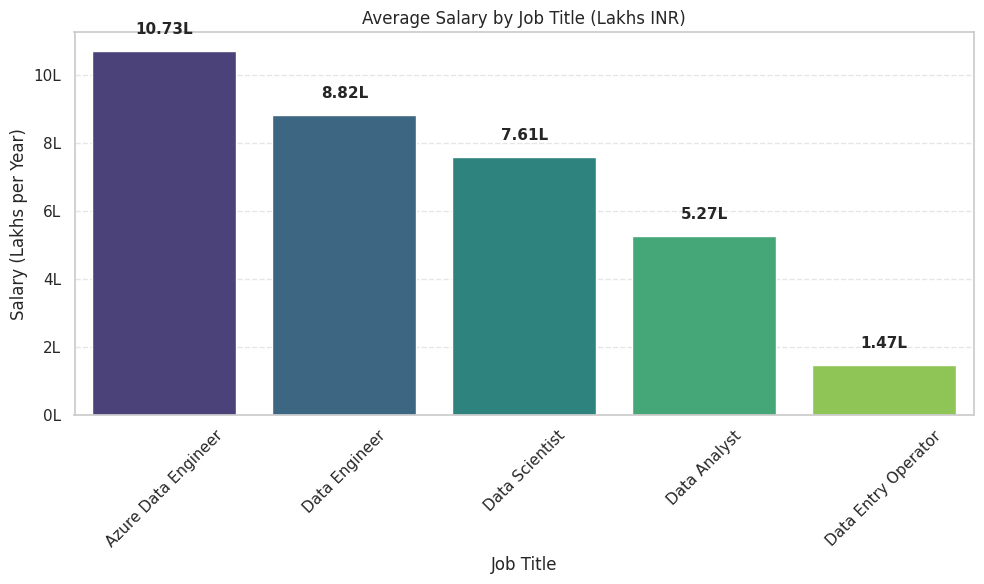

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df['salary_lakhs'] = df['salary_avg_estimate'] / 100000

# Compute average salary per top 5 job titles
top_roles = df['job_title'].value_counts().head(5).index
avg_salaries = (
    df[df['job_title'].isin(top_roles)]
    .groupby('job_title')['salary_lakhs']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=avg_salaries.index, y=avg_salaries.values, palette='viridis')

# Add value labels on top of bars
for i, val in enumerate(avg_salaries.values):
    plt.text(i, val + 0.5, f'{val}L', ha='center', fontsize=11, fontweight='bold')

# Formatting
plt.title('Average Salary by Job Title (Lakhs INR)')
plt.ylabel('Salary (Lakhs per Year)')
plt.xlabel('Job Title')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Y-axis formatting
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)}L'))

plt.tight_layout()
plt.show()


#### Job postings by Location

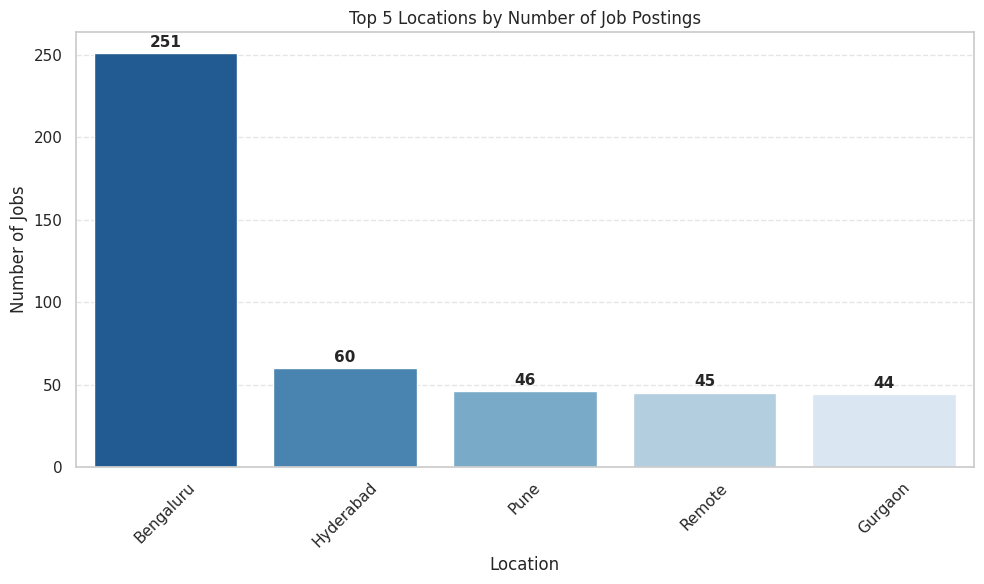

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 cities by job posting count
top_cities = df['location'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_r')

# Annotate count on top of bars
for i, val in enumerate(top_cities.values):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
plt.title('Top 5 Locations by Number of Job Postings')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Salary by Location

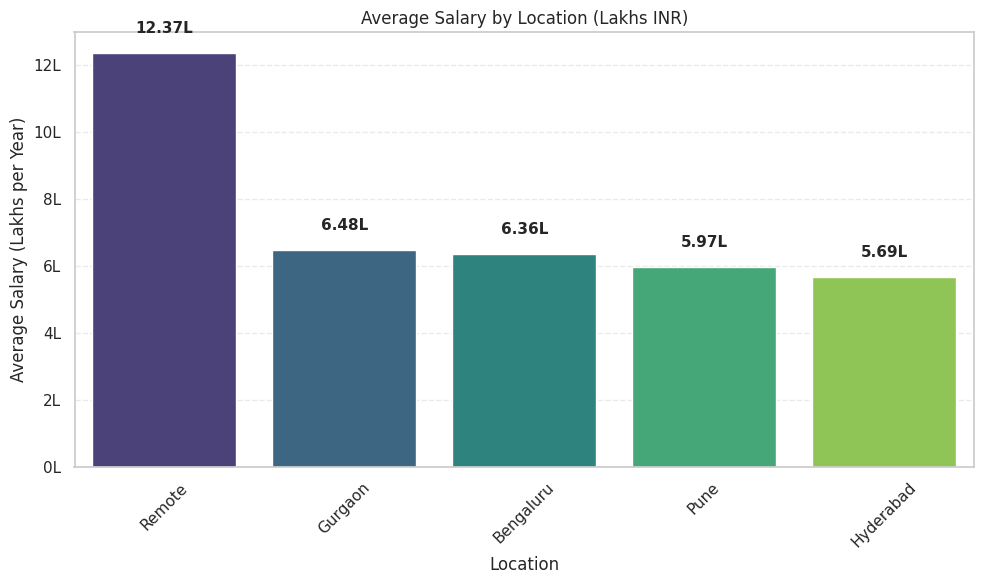

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Make sure 'salary_lakhs' column exists
df['salary_lakhs'] = df['salary_avg_estimate'] / 100000

# Get top 5 cities with most job postings
top_cities = df['location'].value_counts().head(5).index

# Calculate average salary for these cities
avg_salary_by_city = (
    df[df['location'].isin(top_cities)]
    .groupby('location')['salary_lakhs']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=avg_salary_by_city.index, y=avg_salary_by_city.values, palette='viridis')

# Add value labels (data legends) on top of bars
for i, val in enumerate(avg_salary_by_city.values):
    plt.text(i, val + 0.5, f'{val}L', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
plt.title('Average Salary by Location (Lakhs INR)')
plt.xlabel('Location')
plt.ylabel('Average Salary (Lakhs per Year)')
plt.xticks(rotation=45)

# Format Y-axis in Lakhs
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)}L'))

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Company Insights

#### Work-Life Balance Ratings

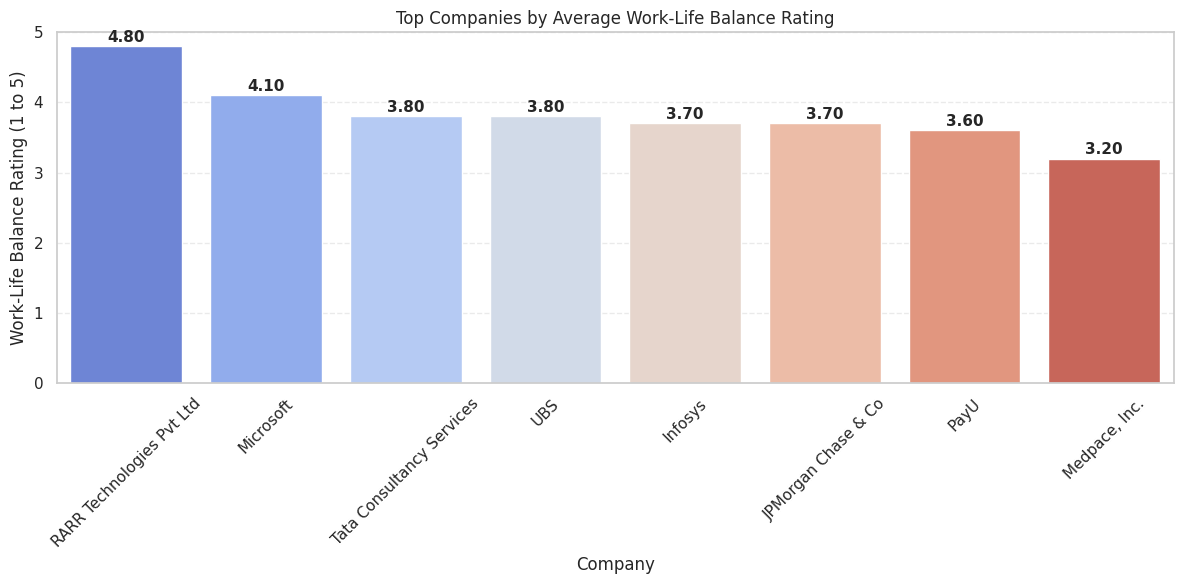

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numeric, if not already
df['work_life_balance_rating'] = pd.to_numeric(df['work_life_balance_rating'], errors='coerce')

# Filter out nulls
df_filtered = df.dropna(subset=['company', 'work_life_balance_rating'])

# Get companies with at least 5 postings for reliability
company_counts = df_filtered['company'].value_counts()
reliable_companies = company_counts[company_counts >= 5].index

# Calculate average work-life rating for top companies
avg_rating = (
    df_filtered[df_filtered['company'].isin(reliable_companies)]
    .groupby('company')['work_life_balance_rating']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(10)  # Top 10 companies
)

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')

# Add value labels on top
for i, val in enumerate(avg_rating.values):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
plt.title('Top Companies by Average Work-Life Balance Rating')
plt.xlabel('Company')
plt.ylabel('Work-Life Balance Rating (1 to 5)')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Technical Skill Requirement from Job Descriptions

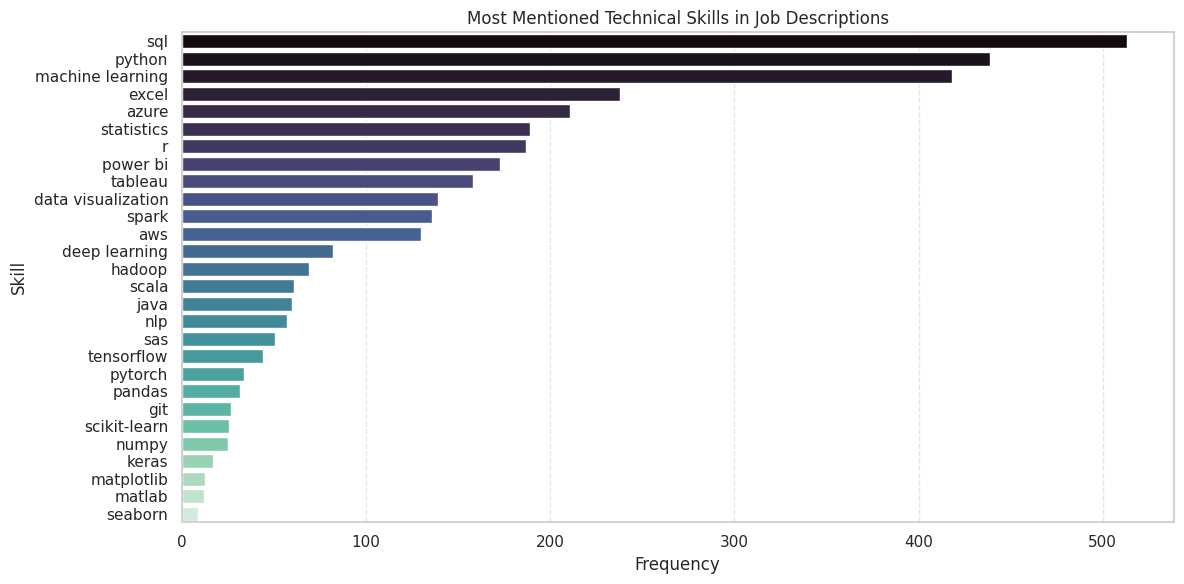

In [12]:
# Sample list of technical skills — expand as needed
technical_skills = [
    'python', 'r', 'sql', 'java', 'c++', 'scala', 'spark', 'hadoop', 'excel',
    'tableau', 'power bi', 'sas', 'matlab', 'tensorflow', 'keras', 'pytorch',
    'machine learning', 'deep learning', 'nlp', 'statistics', 'data visualization',
    'pandas', 'numpy', 'scikit-learn', 'seaborn', 'matplotlib', 'aws', 'azure', 'git'
]
# Combine and lowercase all job descriptions
job_desc = ' '.join(df['job_description'].dropna().astype(str)).lower()
from collections import Counter

# Count each skill in the job descriptions
skill_counts = Counter()
for skill in technical_skills:
    matches = re.findall(rf'\b{re.escape(skill)}\b', job_desc)
    if matches:
        skill_counts[skill] = len(matches)

# Convert to DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='mako')

plt.title('Most Mentioned Technical Skills in Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Company Categorization

In [13]:
# Sample classification
company_type_map = {
    # Product-based MNCs
    'Google': 'Product MNC',
    'Microsoft': 'Product MNC',
    'Oracle': 'Product MNC',
    'PhonePe': 'Product MNC',
    'Adobe': 'Product MNC',
    'SAP': 'Product MNC',
    'Nvidia': 'Product MNC',

    # Service-based MNCs
    'Infosys': 'Service MNC',
    'Tata Consultancy Services': 'Service MNC',
    'Wipro': 'Service MNC',
    'HCL Technologies': 'Service MNC',
    'Capgemini': 'Service MNC',
    'Tech Mahindra': 'Service MNC',
    'Accenture': 'Service MNC',

    # Startups
    'Sanfoundry': 'Startup',
    'BigShyft': 'Startup',
    'Beinex': 'Startup',
    'Leventm Technologies': 'Startup',
    'Findem': 'Startup',
    'Bullsmart': 'Startup',
    'Uptricks Services Pvt. Ltd.': 'Startup',
    'Hypersonix': 'Startup',
}


In [14]:
# Create new column for company category
df['company_category'] = df['company'].map(company_type_map)

# Drop null categories (unclassified companies)
df_categorized = df.dropna(subset=['company_category'])


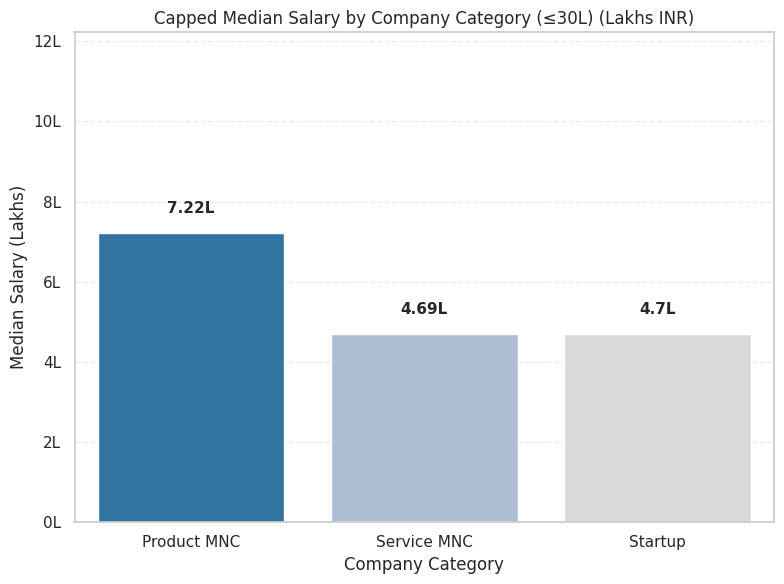

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

# Ensure salary in lakhs is calculated
df_categorized['salary_lakhs'] = df_categorized['salary_avg_estimate'] / 100000

# Cap salary to remove outlier effect (max 30L)
df_categorized['salary_lakhs_capped'] = df_categorized['salary_lakhs'].clip(upper=30)

# Recalculate median salary by company category using capped values
median_salary_by_category = (
    df_categorized.groupby('company_category')['salary_lakhs_capped']
    .median()
    .round(2)
    .reindex(['Product MNC', 'Service MNC', 'Startup'])  # Force visual order
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=median_salary_by_category.index,
    y=median_salary_by_category.values,
    palette=['#1f77b4', '#a6bddb', '#d9d9d9']  # Highlight Product MNC
)

# Annotate values
for i, val in enumerate(median_salary_by_category.values):
    plt.text(i, val + 0.5, f'{val}L', ha='center', fontsize=11, fontweight='bold')

# Formatting
plt.title('Capped Median Salary by Company Category (≤30L) (Lakhs INR)')
plt.xlabel('Company Category')
plt.ylabel('Median Salary (Lakhs)')
plt.ylim(0, max(median_salary_by_category.values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Format y-axis to show 'L'
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)}L'))

plt.tight_layout()
plt.show()


In [16]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def summarize_job_description(text, top_n=3):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""

    sentences = sent_tokenize(text)

    if len(sentences) <= top_n:
        return " ".join(sentences)

    # TF-IDF scoring
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(sentences)
    scores = tfidf_matrix.sum(axis=1).A1  # Convert to flat array

    # Get top N sentence indices
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:top_n]

    # Keep the top sentences in original order
    top_sentences = [sentences[i] for i in sorted(top_indices)]

    return " ".join(top_sentences)


In [21]:
df['cleaned_job_description'] = df['job_description'].apply(summarize_job_description)


In [23]:
df.to_csv("cleaned_jobs.csv", index=False)


In [24]:
from IPython.display import FileLink
FileLink("cleaned_jobs.csv")


/kaggle/working/cleaned_jobs.csv

In [2]:
import pandas as pd
import re
import os

# 1. Load the Excel file
df = pd.read_excel("/kaggle/input/glassdoor-job-postings/Glassdoor_Job_Postings.xlsx")  # change file name if needed

# 2. Clean non-ASCII characters from all text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
    

# 3. Save cleaned CSV in UTF-8 encoding
cleaned_file = "cleaned_jobs_utf8.csv"
df.to_csv(cleaned_file, index=False, encoding='utf-8')

# 4. Provide download link (Jupyter/Colab only)
try:
    from IPython.display import FileLink, display
    display(FileLink(cleaned_file))
    print(f"✅ File '{cleaned_file}' is ready for download.")
except:
    print(f"✅ File saved as '{cleaned_file}' in the current directory.")


/kaggle/working/cleaned_jobs_utf8.csv

✅ File 'cleaned_jobs_utf8.csv' is ready for download.
